## Regression with Google Maps dataset

The  task is to find one corner (vertex) of a building in each image. The data comes from screenshots of Google Maps

In [46]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [47]:
from fastai.vision import *

## Getting and converting the data

In [50]:
path = untar_data('perimeter_data')

In [51]:
fname = '1.jpg'

In [52]:
def img2txt_name(f): return path/f'{str(f)[:-4]}.txt'

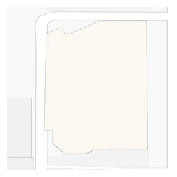

In [53]:
img = open_image(path/fname)
img.show()

In [85]:
coords = np.genfromtxt(img2txt_name(fname), skip_header=0,delimiter=","); ctr

tensor([[[210.,  23.],
         [ 69.,  35.],
         [213., 217.],
         [ 59., 188.]]], dtype=torch.float64)

In [130]:
def switch_x_y(coords):
    for i in range(0,len(coords)):
        coords[i][0], coords[i][1]= coords[i][1],coords[i][0]
    return coords

def get_coords(f):
    coords = np.genfromtxt(img2txt_name(fname), skip_header=0,delimiter=",")

    coords = switch_x_y(coords)

    return tensor(coords)

def get_ip(img,pts): return ImagePoints(FlowField(img.size, pts), scale=True)

In [131]:
get_coords(fname)

tensor([[ 35.,  69.],
        [ 23., 210.],
        [217., 213.],
        [188.,  59.]], dtype=torch.float64)

In [132]:
img.size

torch.Size([250, 250])

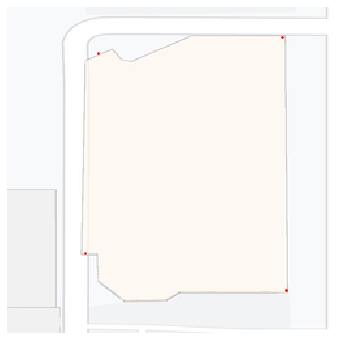

In [134]:
# coords = tensor([[[ 35.,  69.],
#          [ 23, 210.],
#          [217., 213.],
#          [188.,59.]]])
coords = get_coords(fname)

img.show(y=get_ip(img, coords), figsize=(6, 6))

## Creating a dataset

In [136]:

data = (PointsItemList.from_folder(path)
        .split_by_valid_func(lambda o: o.parent.name=='test')
        .label_from_func(get_coords)
        .transform(size=(300,300))
        .databunch(bs = 5,num_workers = 0).normalize()
      )




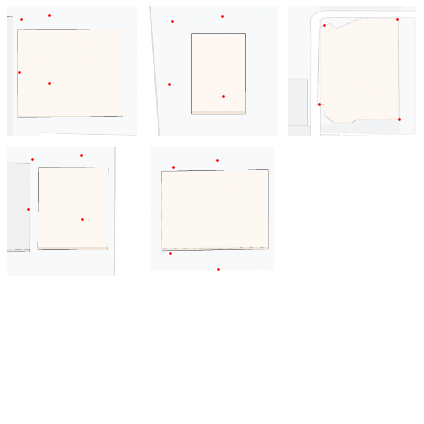

In [137]:
data.show_batch(7, figsize=(6,6))

## Train model

In [14]:
learn = cnn_learner(data, models.resnet34)

epoch,train_loss,valid_loss,time
0,3.541665,#na#,00:06
1,3.920949,#na#,00:06
2,4.482434,#na#,00:06
3,4.437335,#na#,00:06
4,4.448888,#na#,00:06
5,4.473697,#na#,00:06
6,4.354155,#na#,00:06
7,4.401475,#na#,00:06
8,4.257224,#na#,00:06
9,4.369419,#na#,00:06


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


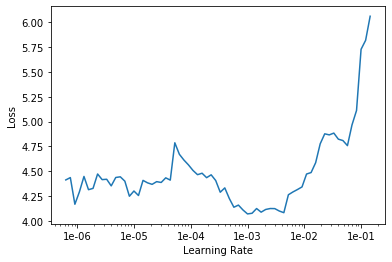

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
lr = 1e-3

In [17]:
learn.fit_one_cycle(1, slice(lr))

epoch,train_loss,valid_loss,time


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ellioteckholm/Documents/AI/perimeter_model/data/perimeter_data/02/6_rgb.jpg'

In [349]:
learn.save('stage-1')

In [350]:
learn.load('stage-1');

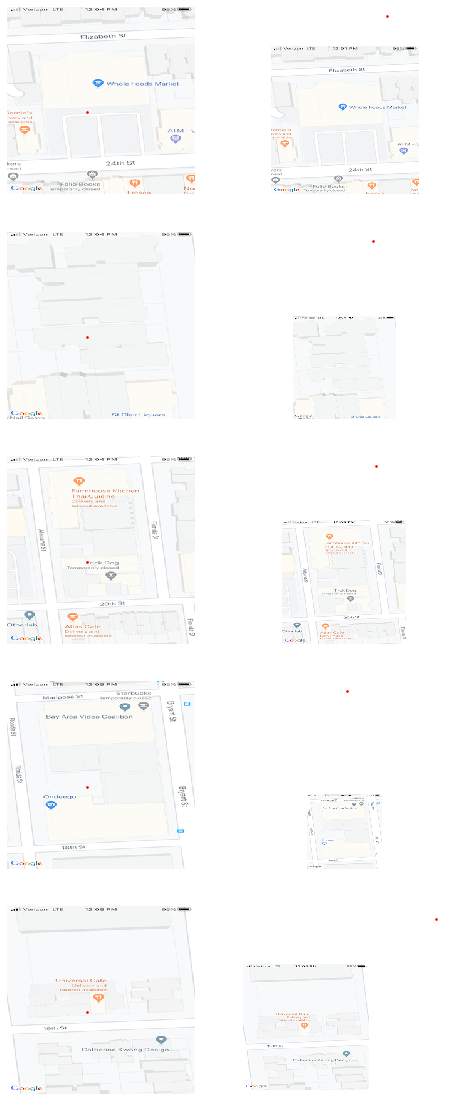

In [351]:
learn.show_results()

## Data augmentation

In [ ]:
tfms = get_transforms(max_rotate=20, max_zoom=1.5, max_lighting=0.5, max_warp=0.4, p_affine=1., p_lighting=1.)

data = (PointsItemList.from_folder(path)
        .split_by_valid_func(lambda o: o.parent.name=='13')
        .label_from_func(get_ctr)
        .transform(tfms, tfm_y=True, size=(120,160))
        .databunch().normalize(imagenet_stats)
       )

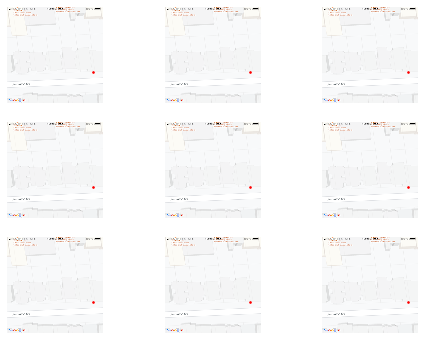

In [390]:
def _plot(i,j,ax):
    x,y = data.train_ds[0]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,6))